# El tradeoff bias-variance

- Compensación de sesgo y varianza

## Versión b.1

El notebook lo puedo modificar, esta versión es la b.1 a 17/11/2023 a las Caracas.

## Aprendizaje Automático [UCV]


* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

# Preliminares





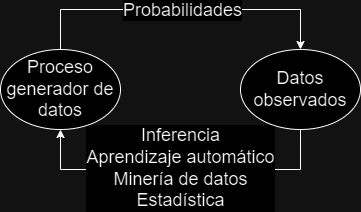

1. All of Statistics: A concise course in Statistical Inference
1. Larry Wasserman

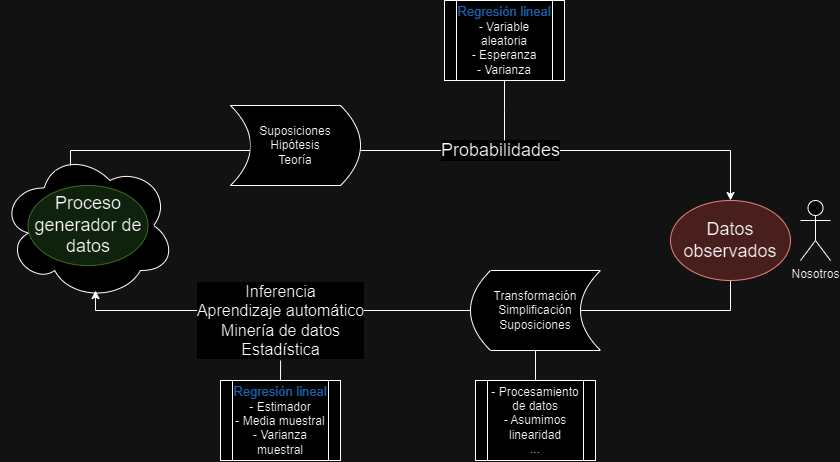





## Un ejemplo con fotos

Tomado de [Bias Variance tradeoff Wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

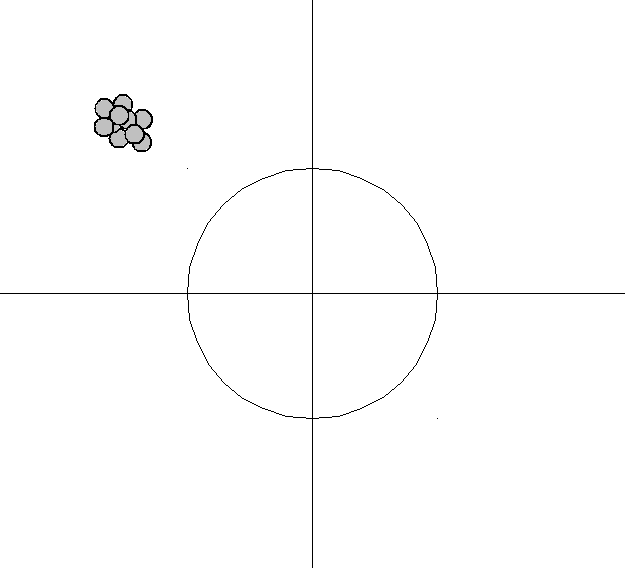

Alto bias, baja varianza

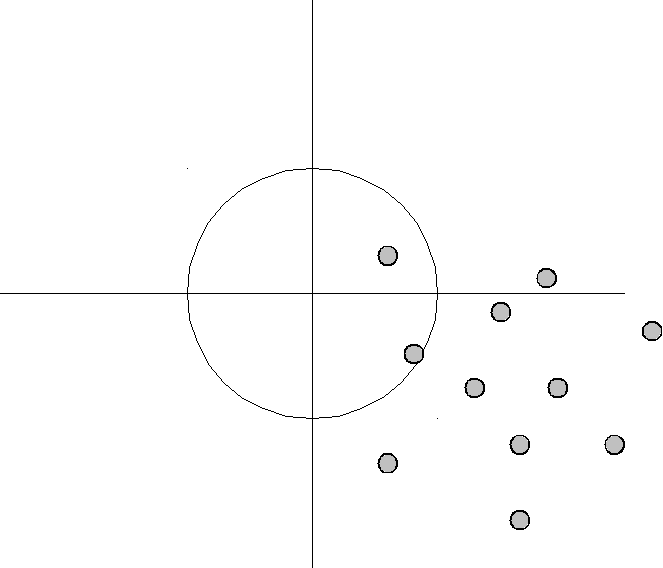

Alto bias, alta varianza

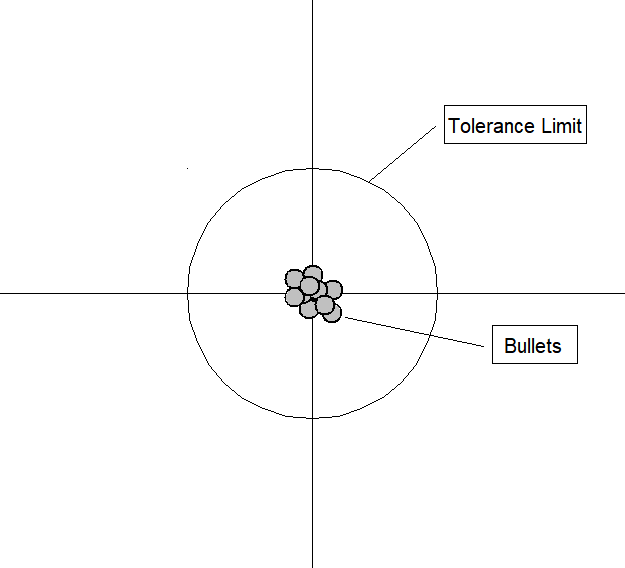

Bajo bias, baja variance

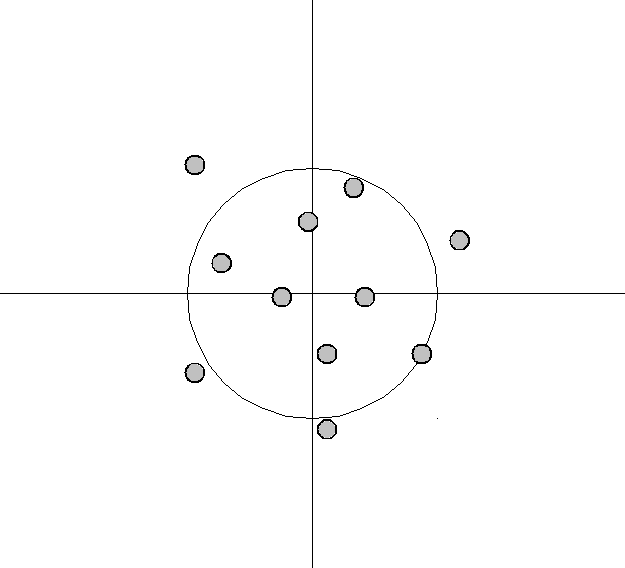

Bajo bias, alta variance

-------

## Breve repaso de probabilidades

Leer [WASS] para profundizar. NO es requerido.

Vamos a hacer un ejemplo de la conexión entre estadística y probabilidades.


1. **Estadístico:**  Dado un conjunto de datos un estadístico es una función aplicada a esos datos.  Por ejemplo, el **promedio muestral** $$\displaystyle \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$$ es un estadístico (distinto de estadística, la ciencia).

1. **Estimador:** De alguna forma, buscamos conectar estadísticos muestrales de la "vida real" con estadísticos deconocidos (y teóricos) de la población de $X$. Supongamos que existen parámetros poblacionales de $X$ que llamaremos $\theta$ que pertenecen a un conjunto $𝛩$, es decir, $\theta \in 𝛩$. <br> Dada una **muestra aleatoria** $$x_1, x_2, ..., x_n \sim X \text{ muestreada de una distribución }X$$ Un estimador $\bar{\theta}$ es un **estadístico** usado para inferir  $\theta \in 𝛩$. Por ejemplo, el **promedio muestral** $\bar{x}$ es un estimador de la **media poblacional** $\mu$. Recordemos, $$\mu = \mathbb{E}(X)$$ y que $$ \mathbb{E}(X) = \begin{cases}
      \sum_{x} x P(X=x) & \text{ si } X \text{ es discreta} \\
      \int x f(x) dx & \text{ si } X \text{ es continua} \\
   \end{cases}
$$
1. **Bias** (sesgo): El bias de un estimador $\text{bias}(\theta, \bar{\theta}) $ está definido como $$\text{bias}(\theta, \bar{\theta}) = \mathbb{E}[\bar{\theta}]-\theta$$. En el caso de $\bar{x}$ y $\mu$ tenemos \begin{aligned}
\text{bias}(\mu, \bar{x}) & = \mu - \mathbb{E}\left[\frac{1}{n} \sum_{i=1}^n x_i\right] \\
& =\mu - \frac{1}{n} \sum_{i=1}^n \mathbb{E}\left(x_i\right) \\
& =\mu - \frac{1}{n} \sum_{i=1}^n \mu \\
& =\mu - \frac{1}{n}(n \mu) \\
& =\mu - \mu \\
\end{aligned} por lo que tenemos dos resultados \begin{aligned}
E[x_i] & =\mu & \text{y además} \\
\text{bias}(\mu, \bar{x}) & = 0
\end{aligned} cuando $\text{bias}(\theta, \bar{\theta}) = 0$ decimos que $\bar{\theta}$ es un estimador **insesgado** de $\theta$
1. La **varianza poblacional** de una variable aleatoria es la esperanza de la desviación cuadrática de su media poblacional y la denotamos $\sigma$ o $\mathbb{V}(X)$. Esto es: $$\sigma = \mathbb{V}(X)=\mathbb{E}\left[(X-\bar{x})^2\right]$$ La varianza muestral $$s^2 = \displaystyle \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$ es fácil demostrar que $$\mathbb{E}(s^2) = \displaystyle \frac{n-1}{n} \sigma$$ por lo que $s^2$ NO es un **estimador insesgado** de $\sigma$. Es por esto que en la práctica, usamos la **varianza muestral insesgada** $$\bar{s}^2 = \displaystyle \frac{1}{n-1} \sum_{i=1}^n (x_i - \mu)^2$$

-------

## Midiendo bias y varianza en OLS

### Hipótesis generales

- $\mathbb{E}(\epsilon)=0$ : Los errores tienen media 0.
- $\operatorname{Var}(\epsilon)=\sigma^2 I$ : Los errores tienen varianza constante (homocedasticidad) y son independientes (no correlacionados).
- $X$ tiene rango full $p$.

### $\hat{\beta}$ es insesgado

Probemos que $\hat{\beta}$ is insesgado.
$$
\mathbb{E}(\hat{\beta})=\mathbb{E}\left(\left(X^T X\right)^{-1} X^T y\right)
$$

Sustituimos $y=X \beta+\epsilon$ :
$$
\begin{aligned}
& \mathbb{E}(\hat{\beta})=\mathbb{E}\left(\left(X^T X\right)^{-1} X^T(X \beta+\epsilon)\right) \\
& \mathbb{E}(\hat{\beta})=\left(X^T X\right)^{-1} X^T \mathbb{E}(X \beta+\epsilon)
\end{aligned}
$$

Como $\mathbb{E}(\epsilon)=0$ :
$$
\begin{gathered}
\mathbb{E}(\hat{\beta})=\left(X^T X\right)^{-1} X^T X \beta \\
\mathbb{E}(\hat{\beta})=\beta
\end{gathered}
$$

En consecuencia, $\hat{\beta}$ es un estimador insesgado de $\beta$.



## Varianza de $\hat{\beta}$

Encontremos la varianza de $\hat{\beta}$.
$$
\begin{gathered}
\mathbb{Var}(\hat{\beta})=\mathbb{Var}\left(\left(X^T X\right)^{-1} X^T y\right) \\
\mathbb{Var}(\hat{\beta})=\left(X^T X\right)^{-1} X^T \mathbb{Var}(y) X\left(X^T X\right)^{-1}
\end{gathered}
$$

Como $y=X \beta+\epsilon$ y $\mathbb{Var}(\epsilon)=\sigma^2 I$ :
$$
\mathbb{Var}(y)=\mathbb{Var}(X \beta+\epsilon)=\sigma^2 I
$$

Entonces,
$$
\begin{gathered}
\mathbb{Var}(\hat{\beta})=\sigma^2\left(X^T X\right)^{-1} X^T X\left(X^T X\right)^{-1} \\
\mathbb{Var}(\hat{\beta})=\sigma^2\left(X^T X\right)^{-1}
\end{gathered}
$$

### Es entonces $\hat{\beta}$ bueno?

Sea $\tilde{\beta}$ cualquier otro estimador lineal con varianza $\mathbb{Var}(\tilde{\beta})$.

Podemos demostrar que $\forall \tilde{\beta}$  
$$
\operatorname{Var}(\tilde{\beta}) \geq \operatorname{Var}(\hat{\beta})
$$

En consecuencia, el estimador OLS $\hat{\beta}$ lo conocemos como el estimador "azul" BLUE: Best Linear Unbiased Estimator (BLUE) el mejor estimador insesgado lineal.

## Qué rescatamos?

- $\hat{\beta}$ es un estimador lineal de $y$
- $\hat{\beta}$ es insesgado
- $\hat{\beta}$ tiene varianza pero de los lineales, es el mejor.

------

## El trade sesgo-varianza (_bias-variance trade-off_)

Cómo podemos medir qué es más importante a la hora de tener sesgo y varianza?

Adaptado de [ISLP] página 32.

Regresemos a nuestro problema original.

Encontrar una función, denotada como $f$, que mapee los datos de entrada $X$ a los de salida $y$. Es decir, $$y= f(X) + \epsilon$$

En general, no podemos conocer $f$ y buscamos **estimarla** y buscar una $\bar{f}$.

El bias (sesgo) de nuestra función será $$\text{bias}(f, \bar{f}) = f-\mathbb{E}(\bar{f})$$ y la varianza será $$\mathbb{E}\left[(f-\bar{f})^2\right]$$

Imaginen ahora que queremos predecir para un $x_0$. El error cuadrático medio sería:

$$\mathbb{E}\left(f(x_0)-\bar{f}\left(x_0\right)\right)^2 = \mathbb{E}\left(y_0-\bar{f}\left(x_0\right)\right)^2 $$

Manipulando los términos, podemos llegar a una expresión que conecta (en el error cuadrático medio):

1. La varianza de $\bar{f}(x_0)$
1. El bias cuadrático de $\bar{f}(x_0)$
1. La varianza del **ruido poblacional** $\epsilon$.

La expresión es:

$$\mathbb{E}\left(y_0-\bar{f}\left(x_0\right)\right)^2=\mathbb{Var}\left(\bar{f}\left(x_0\right)\right)+\left[\operatorname{Bias}\left(\bar{f}\left(x_0\right)\right)\right]^2+\mathbb{Var}(\epsilon)$$

Esta formula es la famosa base de la expresión "bias-variance tradeoff"

-------

### Regresemos a Ridge



#### **Ridge**: Formulación lagrangeana

1. $h = 0$, $\mathbf{L}=\mathbf{U}=\mathbf{0}$
1. $A = \mathbf{0}$, $f(\mathbf{\hat{e}}) = {\frac{1}{2}\| \mathbf{\hat{e}} \|}^2_2$
1. $g(\mathbf{\beta}) = \lambda {\| \mathbf{\beta} \|}_2^2$.

Entonces, nuestro problema se convierte en:

$$Ridge(\lambda)\;\;\underset{\beta,\mathbf{\hat{e}}}{min}\;\; \frac{1}{2}\|\mathbf{\hat{e}}\|_2^2 + \lambda \|\beta\|_2^2\;\;s.t.$$
$$\mathbf{y} - X \beta = \mathbf{\hat{e}}$$
$$\beta \in \mathbb{R}^p,\;\;y, \mathbf{\hat{e}} \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times p}$$

### Solución analítica

$$\beta(\lambda)=\left(X^{\top} X+\lambda \mathbf{I}_{pp}\right)^{-1} X^{\top} y$$

### Es insesgado?

\begin{aligned}
\widehat{\beta}^{\text {ridge }} & =\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}+ \lambda \mathbf{I}\right)^{-1} \mathbf{X}^{\mathrm{T}} \mathbf{y} \\
& =\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}+ \lambda \mathbf{I}\right)^{-1}\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1} \mathbf{X}^{\mathrm{T}} \mathbf{y} \\
& =\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}+ \lambda \mathbf{I}\right)^{-1}\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right) \widehat{\beta}^{\text {ols }}
\end{aligned}

Podemos analizar entonces

$\widehat{\beta}^{\text {ridge }}$ es un estimador sesgado (dado que OLS es insesgado) para cualquier $\lambda$ distinto de $0$.
- Si $\lambda \rightarrow 0$, la solución de ridge tiende a OLS
- Si $\lambda \rightarrow \infty, \widehat{\beta}^{\text {ridge }} \rightarrow 0$

### Qué sucede con la varianza?

Analicemos el caso extremo donde $\mathbf{X}^{\mathrm{T}} \mathbf{X}= \mathbf{I}$,

- $\mathbf{X}$ es una matriz ortogonal con columnas estandarizadas y ortogonales.
- Fíjense que cada $\beta_j^{\text {ols }}$ es una proyección de $\mathbf{y}$ sobre $\mathbf{x}_j$, la $j$-ésima columna de $X$.
- Lo más importante:
$$
\begin{aligned}
\widehat{\beta}^{\text {ridge }} & =\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}+n \lambda \mathbf{I}\right)^{-1}\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right) \widehat{\beta}^{\text {ols }} \\
& =(\mathbf{I}+\lambda \mathbf{I})^{-1} \widehat{\beta}^{\text {ols }} \\
& =(1+\lambda)^{-1} \widehat{\beta}^{\text {ols }} \\
\Longrightarrow \beta_j^{\text {ridge }} & =\frac{1}{1+\lambda} \beta_j^{\text {ols }}
\end{aligned}
$$

En consecuencia en este caso particular tanto el sesgo como la varianza las podemos expresar analíticamente como:
- $\operatorname{Bias}\left(\beta_j^{\text {ridge }}\right)=\frac{-\lambda}{1+\lambda} \beta_j^{\text {ols }}($ distinto de 0 $)$
- $\operatorname{Var}\left(\beta_j^{\text {ridge }}\right)=\frac{1}{(1+\lambda)^2} \operatorname{Var}\left(\beta_j^{\text {ols }}\right)$ (REDUCCIÓN DE OLS)

- Desde el punto de vista estadístico, la función de complejidad básicamente añade sesgo a nuestros estimadores con la ventaja de reducir su varianza. Esto significa que se encuentran mejores estimadores para que podamos **generalizar** mejor para datos desconocidos.

-------------

# Introducción a K-vecinos

Uno de los modelos más simples de entender:

1. **Parámetros**: Entero $K \in \mathbb{N}$
1. **Idea:**: Si quiero predecir para un $x_0$, encontrar los $K$ puntos más cercanos a $x_0$ y hacer un esquema de votación para cada $c \in C$.
1. **Importante**:
  - El esquema de votación depende de nosotros.
  - Qué significa más cercano también.
1. Qué peculiaridad tiene este modelo?

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)


X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
iris = load_iris(as_frame=True)

In [ ]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [ ]:
X_train

,sepal length (cm),sepal width (cm)
60,5.0,2.0
1,4.9,3.0
8,4.4,2.9
93,5.0,2.3
106,4.9,2.5
...,...,...
66,5.6,3.0
29,4.7,3.2
130,7.4,2.8
141,6.9,3.1


In [ ]:
K=15

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 model = KNeighborsClassifier(n_neighbors=K)

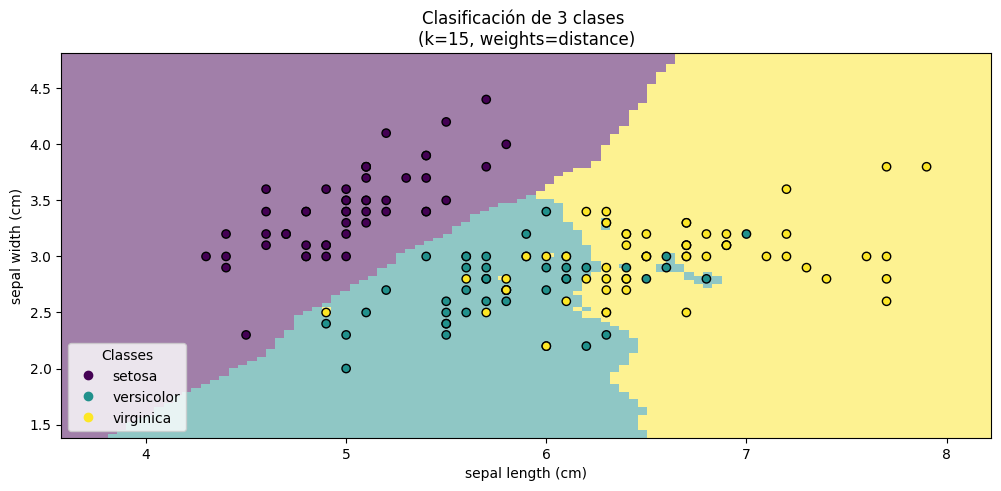

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=1, figsize=(12, 5))

model.set_params(weights="distance").fit(X_train, y_train)
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_test,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
    alpha=0.5,
    ax=axs,
)
scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="lower left",
    title="Classes",
)
_ = disp.ax_.set_title(
    f"Clasificación de 3 clases \n(k={model.n_neighbors}, weights=distance)"
)


## Con pipeline

In [ ]:
K = 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=K))]
)

In [ ]:
y_test

39     0
12     0
48     0
23     0
81     1
55     1
99     1
9      0
85     1
129    2
100    2
121    2
67     1
103    2
89     1
21     0
3      0
147    2
19     0
51     1
149    2
88     1
86     1
0      0
134    2
36     0
24     0
90     1
142    2
65     1
46     0
54     1
139    2
113    2
6      0
50     1
136    2
109    2
Name: target, dtype: int64

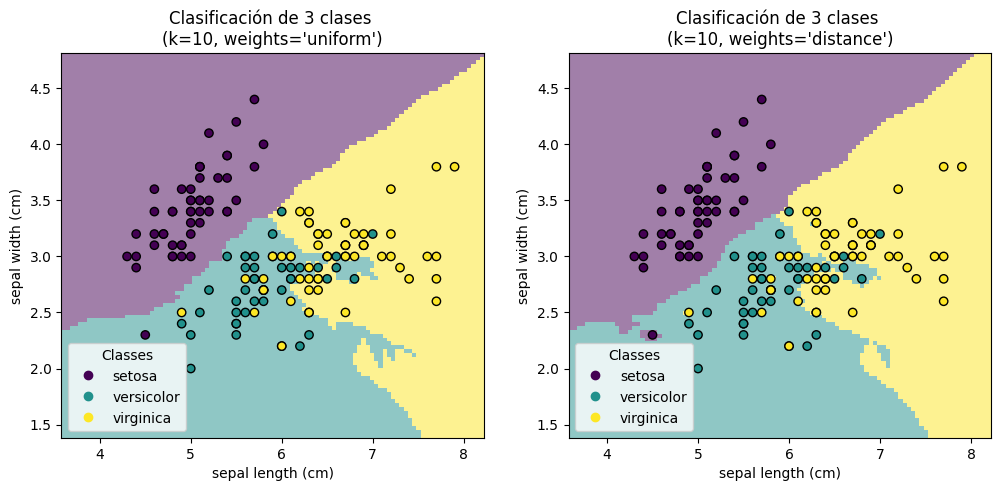

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"Clasificación de 3 clases \n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


### Matriz de confusión

La entrada $i,j$ de la matriz de confusión, $M_{ij}$, representa el número de predicciones donde elementos de la clase $i$ tuvo predicción $j$.

Esto quiere decir que buscamos una matriz diagonal donde estén maximizadas las entradas $i,i$ para toda clase $i$

In [ ]:
confusion_matrix(y_test, clf.predict(X_test))

array([[13,  0,  0],
       [ 0,  7,  6],
       [ 0,  8,  4]])

### Accuracy (Precisión)

Métrica (estadístico) que responde a la pregunta: cuántas predicciones cuya clase inicial fue $i$ tuvieron predicción $i$. Esto quiere decir que el valor es la suma de la diagonal dividido entre el número de predicciones.

In [ ]:
accuracy_score(y_test, clf.predict(X_test))

0.631578947368421

In [ ]:
(13+7+4)/(13+7+4+8+6)

0.631578947368421

## Conexión con variance-bias tradeoff

Matemáticamente, buscamos: $$\operatorname{Pr}\left(Y=c \mid X=x_0\right)=\frac{1}{K} \sum_{i \in \mathcal{V}_0} I\left(y_i=c\right) $$ siendo $\mathcal{V}_0$ la **vecindad** de $x_0$

En [ESL] podemos encontrar una solución cerrada: $$\mathbb{E}\left[(y-\bar{f}(x))^2 \mid X=x_0\right]=\left(f(x)-\frac{1}{k} \sum_{i=1}^k f\left(\mathcal{V}_i(x)\right)\right)^2+\frac{\sigma^2}{k}+\sigma^2$$

1. Mientras $k$ sea más pequeña, disminuye el bias y aumenta la varianza.
1. Para valores grandes de $k$, aumenta el bias y disminuye la varianza.
